### 0. Libraries

In [3]:
import numpy as np
import pandas as pd
import time
from datetime import date
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns', None) 
import seaborn as sns 
import scipy.stats as stats
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.stats import chi2_contingency
from scipy.spatial.distance import cdist
#import the model
from sklearn import linear_model
#import evaluation metrics
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.cluster import KMeans
from sklearn import metrics
import sklearn.metrics as metrics 
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from mlxtend.plotting import plot_decision_regions
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks


from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where

## Step 1: Read the file

- the csv-file has no header names -> create the header names
- the command pd.read need the additiona "header=None", so that the first row will be read as the second row and the header names become the first row

- create the header names

In [4]:
col = ['Customer Number', 'Offer Accepted', 'Reward', 'Mailer Type', 'Income Level', 'Bank Accounts Open', 'Overdraft Protection', 'Credit Rating', 'Credit Cards Held', 'Homes Owned', 'Household Size', 'Own Your Home', 'Average Balance', 'Q1 Balance', 'Q2 Balance', 'Q3 Balance', 'Q4 Balance']
col

['Customer Number',
 'Offer Accepted',
 'Reward',
 'Mailer Type',
 'Income Level',
 'Bank Accounts Open',
 'Overdraft Protection',
 'Credit Rating',
 'Credit Cards Held',
 'Homes Owned',
 'Household Size',
 'Own Your Home',
 'Average Balance',
 'Q1 Balance',
 'Q2 Balance',
 'Q3 Balance',
 'Q4 Balance']

- and standardize the header names

In [5]:
col = [x.lower().replace(" ", "_") for x in col]
col

['customer_number',
 'offer_accepted',
 'reward',
 'mailer_type',
 'income_level',
 'bank_accounts_open',
 'overdraft_protection',
 'credit_rating',
 'credit_cards_held',
 'homes_owned',
 'household_size',
 'own_your_home',
 'average_balance',
 'q1_balance',
 'q2_balance',
 'q3_balance',
 'q4_balance']

- read the csv file ad add the header names

In [6]:
df = pd.read_csv('creditcardmarketing.csv', header=None, names=col)

## Step 2 : Wrangling and Explore the data

In [7]:
df.head()

,customer_number,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [8]:
df.shape

(18000, 17)

- check the datatypes

In [9]:
df.dtypes

customer_number           int64
offer_accepted           object
reward                   object
mailer_type              object
income_level             object
bank_accounts_open        int64
overdraft_protection     object
credit_rating            object
credit_cards_held         int64
homes_owned               int64
household_size            int64
own_your_home            object
average_balance         float64
q1_balance              float64
q2_balance              float64
q3_balance              float64
q4_balance              float64
dtype: object

- Check the missing values

Result: Missing values exists in the dataset.

In [10]:
df.isnull().sum()

customer_number          0
offer_accepted           0
reward                   0
mailer_type              0
income_level             0
bank_accounts_open       0
overdraft_protection     0
credit_rating            0
credit_cards_held        0
homes_owned              0
household_size           0
own_your_home            0
average_balance         24
q1_balance              24
q2_balance              24
q3_balance              24
q4_balance              24
dtype: int64

- Our decision: We replace the missing values with the mean only for the column average balance.  Because in later steps we drop the columns q1_balance to q4_balance.

In [11]:
mean_average_balance = np.mean(df['average_balance'])

In [13]:
df['average_balance'] = df['average_balance'].fillna(mean_average_balance)

- check the duplicates

In [14]:
df.duplicated().sum()

0

In [15]:
df.shape

(18000, 17)

In [16]:
df.describe()

,customer_number,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
count,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,18000.000000,17976.000000,17976.000000,17976.000000,17976.000000
mean,9000.500000,1.255778,1.903500,1.203444,3.499056,940.515562,910.450656,999.392190,1042.033600,810.185803
std,5196.296758,0.472501,0.797009,0.427341,1.114182,350.064214,620.077060,457.402268,553.452599,559.001365
min,1.000000,1.000000,1.000000,1.000000,1.000000,48.250000,0.000000,0.000000,0.000000,0.000000
25%,4500.750000,1.000000,1.000000,1.000000,3.000000,787.937500,392.750000,663.000000,633.000000,363.000000
50%,9000.500000,1.000000,2.000000,1.000000,3.000000,1006.500000,772.000000,1032.000000,945.500000,703.000000
75%,13500.250000,1.000000,2.000000,1.000000,4.000000,1152.562500,1521.000000,1342.000000,1463.000000,1212.000000
max,18000.000000,3.000000,4.000000,3.000000,9.000000,3366.250000,3450.000000,3421.000000,3823.000000,4215.000000


In [17]:
df = df.drop(['customer_number'], axis=1)
df

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50,136.0,65.0,71.0,398.0
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50,984.0,940.0,943.0,535.0
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25,918.0,767.0,1170.0,1494.0
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25,626.0,983.0,865.0,1615.0


- We have the average balance. This columns shows us the same like the four columns q1_balance to q4_balance. 
- Our decision: We drop the column q1_balance to q4_balance. 

In [18]:
df = df.drop(['q1_balance', 'q2_balance','q3_balance','q4_balance'], axis=1)
df

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00
...,...,...,...,...,...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,1,No,Low,1,1,5,Yes,167.50
17996,No,Cash Back,Letter,High,1,No,Low,3,1,3,Yes,850.50
17997,No,Cash Back,Letter,High,1,No,Low,2,1,4,No,1087.25
17998,No,Cash Back,Letter,Medium,1,No,Medium,4,2,2,Yes,1022.25


- check the Missing Valuse again

In [19]:
df.isnull().sum()

offer_accepted          0
reward                  0
mailer_type             0
income_level            0
bank_accounts_open      0
overdraft_protection    0
credit_rating           0
credit_cards_held       0
homes_owned             0
household_size          0
own_your_home           0
average_balance         0
dtype: int64

## Step 3: Explore the data

- numerical data
- create a df only with numerical data

In [20]:
df_num = df.select_dtypes(include = np.number)
df_num

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance
0,1,2,1,4,1160.75
1,1,2,2,5,147.25
2,2,2,1,2,276.50
3,2,1,1,4,1219.00
4,1,2,1,6,1211.00
...,...,...,...,...,...
17995,1,1,1,5,167.50
17996,1,3,1,3,850.50
17997,1,2,1,4,1087.25
17998,1,4,2,2,1022.25


In [21]:
df_num.shape

(18000, 5)

<AxesSubplot:xlabel='average_balance'>

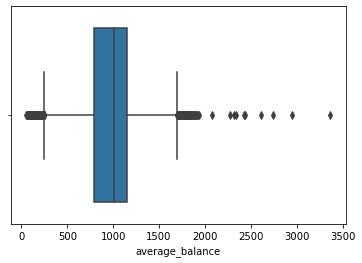

In [22]:
sns.boxplot(x=df_num['average_balance'])

array([[<AxesSubplot:title={'center':'bank_accounts_open'}>,
        <AxesSubplot:title={'center':'credit_cards_held'}>,
        <AxesSubplot:title={'center':'homes_owned'}>,
        <AxesSubplot:title={'center':'household_size'}>],
       [<AxesSubplot:title={'center':'average_balance'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

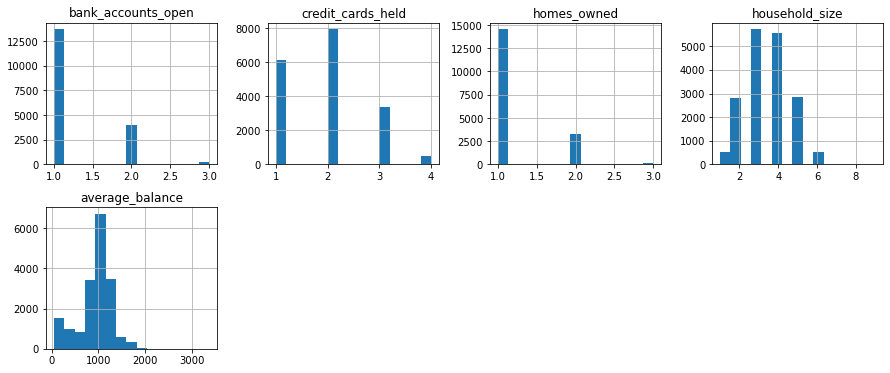

In [23]:
df_num.hist(bins=15,figsize=(15,6), layout=(2,4))

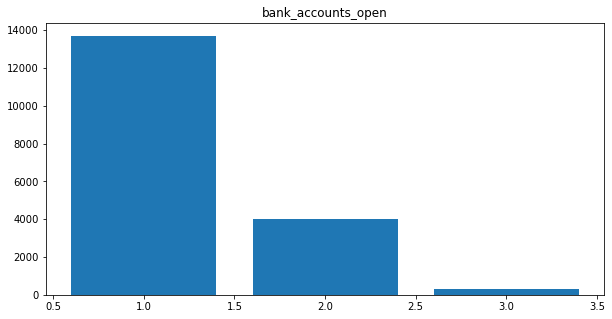

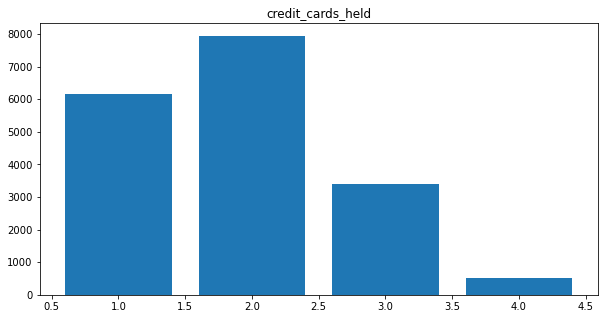

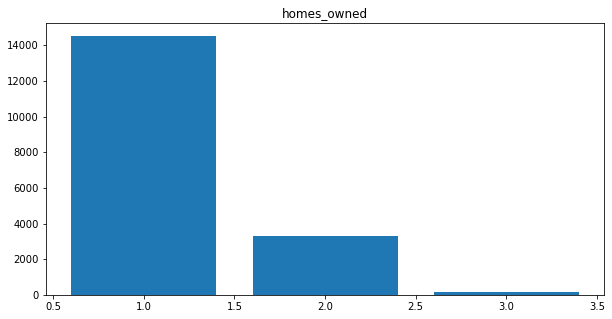

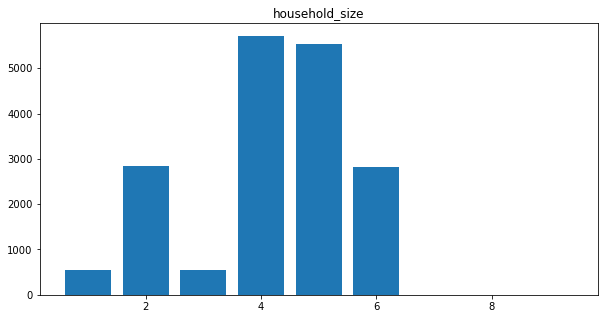

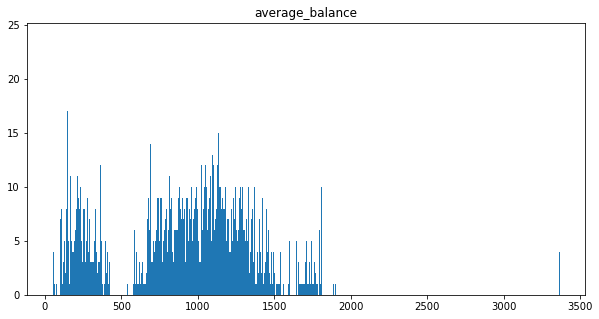

In [24]:
for c in df_num:
    plt.figure(figsize=(10,5))
    plt.bar(df_num[c].unique(), df_num[c].value_counts())
    plt.title(c)
    plt.show();

- check the categorical data
- create a df only with categorical data

In [25]:
df_cat = df.select_dtypes(include = np.object)
df_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,No
17998,No,Cash Back,Letter,Medium,No,Medium,Yes


In [26]:
df_cat.shape

(18000, 7)

Frequency analysis of column:  offer_accepted
Frequency analysis of column:  reward
Frequency analysis of column:  mailer_type
Frequency analysis of column:  income_level
Frequency analysis of column:  overdraft_protection
Frequency analysis of column:  credit_rating
Frequency analysis of column:  own_your_home


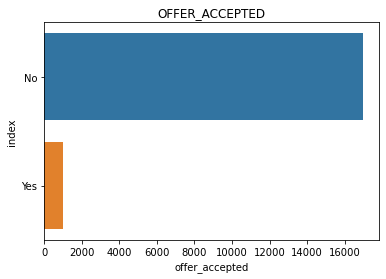

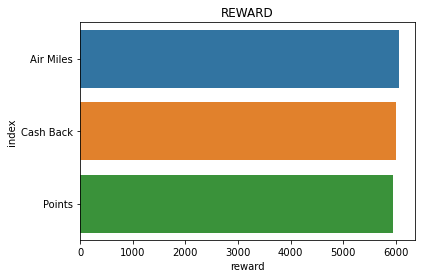

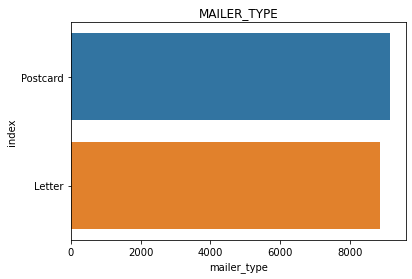

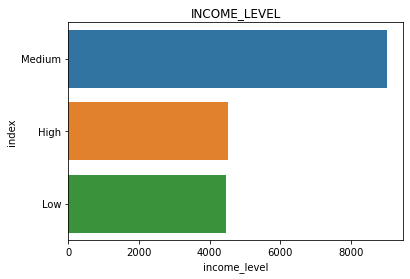

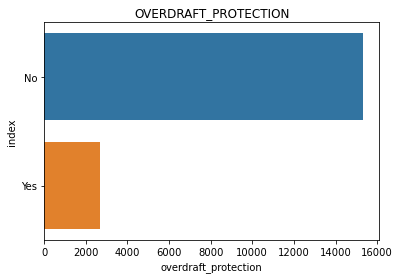

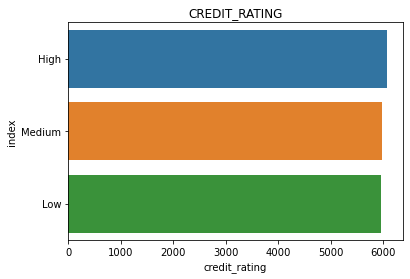

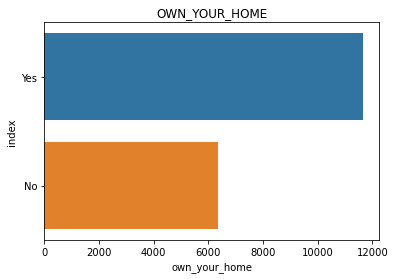

<Figure size 432x288 with 0 Axes>

In [27]:
cols_cat = list(df_cat.select_dtypes(include=['object']).columns)

for col in cols_cat:
    print("Frequency analysis of column: ",col)
    my_data = df[col].value_counts().reset_index()
    ax = sns.barplot(x=col, y="index", data = my_data).set_title(col.upper())
    plt.figure()
    print

<AxesSubplot:xlabel='offer_accepted', ylabel='average_balance'>

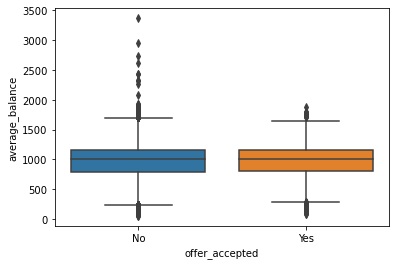

In [28]:
sns.boxplot(x=df['offer_accepted'], y=df['average_balance'])

Result column average balance The boxplot shows a lot of outliers in the average_balanced. We will try to discover the influence of the outliers of the accuracy of our model. Because the imbalanced step will improve our dataset for a better model accuracy. And that could be happen by doing reduce the dataset. If we drop the outliers we will reduce the dataset too. So we will create three datasets:
1. All outliers stays in the data set.
2. We drop all outliers with the IQR-Limits.
3. we drop the outliers only with a 95 % upper limit and a 5% lower limit.

- Our decision: We keep the outliers.

## Pre-Processing

## Encode our categorical variables

- We do not know the relationship between your target variable and categorical features.
- encoded tha categorical values -> get_dummies_method

In [29]:
df_cat

,offer_accepted,reward,mailer_type,income_level,overdraft_protection,credit_rating,own_your_home
0,No,Air Miles,Letter,High,No,High,No
1,No,Air Miles,Letter,Medium,No,Medium,Yes
2,No,Air Miles,Postcard,High,No,Medium,Yes
3,No,Air Miles,Letter,Medium,No,High,No
4,No,Air Miles,Letter,Medium,No,Medium,Yes
...,...,...,...,...,...,...,...
17995,No,Cash Back,Letter,High,No,Low,Yes
17996,No,Cash Back,Letter,High,No,Low,Yes
17997,No,Cash Back,Letter,High,No,Low,No
17998,No,Cash Back,Letter,Medium,No,Medium,Yes


In [30]:
categorical = pd.get_dummies(df_cat,
drop_first=True,
columns=['offer_accepted','reward', 'mailer_type', 'income_level','overdraft_protection', 'credit_rating', 'own_your_home' ])

In [31]:
categorical

,offer_accepted_Yes,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,1
2,0,0,0,1,0,0,0,0,1,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
17995,0,1,0,0,0,0,0,1,0,1
17996,0,1,0,0,0,0,0,1,0,1
17997,0,1,0,0,0,0,0,1,0,0
17998,0,1,0,0,0,1,0,0,1,1


- Standardize the numerical variables

In [32]:
transformer = MinMaxScaler().fit(df_num)
x_mmscaled = transformer.transform(df_num)
print(x_mmscaled.shape)

(18000, 5)


In [33]:
x_num = pd.DataFrame(x_mmscaled, columns=df_num.columns)
x_num

,bank_accounts_open,credit_cards_held,homes_owned,household_size,average_balance
0,0.0,0.333333,0.0,0.375,0.335292
1,0.0,0.333333,0.5,0.500,0.029837
2,0.5,0.333333,0.0,0.125,0.068791
3,0.5,0.000000,0.0,0.375,0.352848
4,0.0,0.333333,0.0,0.625,0.350437
...,...,...,...,...,...
17995,0.0,0.000000,0.0,0.500,0.035940
17996,0.0,0.666667,0.0,0.250,0.241787
17997,0.0,0.333333,0.0,0.375,0.313140
17998,0.0,1.000000,0.5,0.125,0.293550


- Drop the target variable y from df_cat

In [34]:
y = categorical['offer_accepted_Yes']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: offer_accepted_Yes, dtype: uint8

In [35]:
categorical = categorical.drop(['offer_accepted_Yes'], axis=1)
categorical

,reward_Cash Back,reward_Points,mailer_type_Postcard,income_level_Low,income_level_Medium,overdraft_protection_Yes,credit_rating_Low,credit_rating_Medium,own_your_home_Yes
0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,1
2,0,0,1,0,0,0,0,1,1
3,0,0,0,0,1,0,0,0,0
4,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...
17995,1,0,0,0,0,0,1,0,1
17996,1,0,0,0,0,0,1,0,1
17997,1,0,0,0,0,0,1,0,0
17998,1,0,0,0,1,0,0,1,1


In [36]:
x_num.shape, y.shape, categorical.shape

((18000, 5), (18000,), (18000, 9))

In [37]:
X = np.concatenate((x_num, categorical), axis=1)
X

array([[0.        , 0.33333333, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.33333333, 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.5       , 0.33333333, 0.        , ..., 0.        , 1.        ,
        1.        ],
       ...,
       [0.        , 0.33333333, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.5       , ..., 0.        , 1.        ,
        1.        ],
       [0.5       , 0.33333333, 0.        , ..., 0.        , 1.        ,
        0.        ]])

Plot the groups of yes and no

Counter({0: 9900, 1: 100})


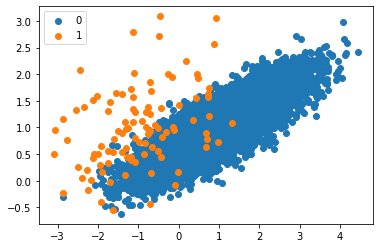

In [38]:
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

### Apply the model

- log. Regression

In [39]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size= 0.4, random_state=40)

In [40]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [41]:
predictions = classification.predict(X_test)

In [42]:
predictions

array([0, 0, 0, ..., 0, 0, 0])

In [43]:
accuracy_score(y_test, predictions)

0.99425

In [44]:
probs = classification.predict_proba(X_test)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7440596881593408


-> AUC-ROC - Graph

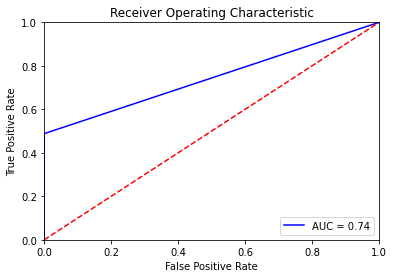

In [45]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- confusion matrix

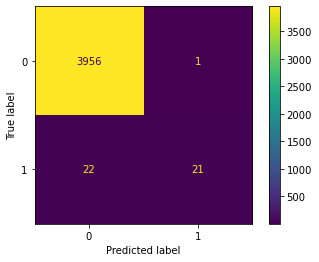

In [46]:
accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

- Accuracy measures

In [47]:
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.01
The mean squared error of the model in the test set is:   0.01
The root mean squared error of the model in the test set is:   0.08
The R2 of the model in the test set is: 0.46


- KNN-Model

In [48]:
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [49]:
knn_predictions = knn_model.predict(X_test)

In [50]:
MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.01
The mean squared error of the model in the test set is:   0.01
The root mean squared error of the model in the test set is:   0.08
The R2 of the model in the test set is: 0.45


In [51]:
def knn_comparison(data, k):
    x = df.iloc[:, 0:2].values
    y = df.iloc[:, -1].astype(int).values
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X, y)

    plt.figure(figsize=(16,12))
    plot_decision_regions(X, y, clf=knn)
    plt.title("Knn with K="+ str(k), fontsize = 18)
    plt.show()

In [52]:
uniform_model = KNeighborsRegressor(n_neighbors=4)
uniform_model.fit(X_train, y_train)
uniform_model.score(X_test, y_test)

0.44608024636940125

In [53]:
distance_model = KNeighborsRegressor(n_neighbors=4, weights = "distance")
distance_model.fit(X_train, y_train)
distance_model.score(X_test, y_test)

0.4671673498803939

# applying SMOTE

In [54]:
smote = SMOTE()

In [55]:
X_sm, y_sm = smote.fit_resample(X, y)

- rund the log.Regression again

In [56]:
X_train, X_test, y_train, y_test =train_test_split(X_sm, y_sm, test_size= 0.3, random_state=40)

In [57]:
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)

In [58]:
predictions = classification.predict(X_test)

In [59]:
accuracy_score(y_test, predictions)

0.912962962962963

In [60]:
probs = classification.predict_proba(X_test)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9130323851715034


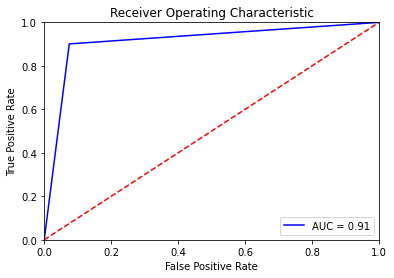

In [61]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

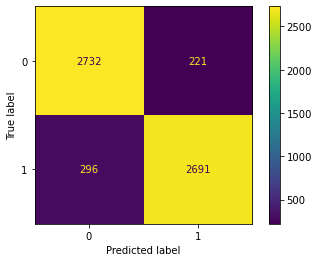

In [62]:
accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

- Accuracy Measure for log. regression

In [63]:
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.09
The mean squared error of the model in the test set is:   0.09
The root mean squared error of the model in the test set is:   0.30
The R2 of the model in the test set is: 0.65


- KNN Model

In [64]:
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [65]:
knn_predictions = knn_model.predict(X_test)

In [66]:
MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.07
The mean squared error of the model in the test set is:   0.04
The root mean squared error of the model in the test set is:   0.20
The R2 of the model in the test set is: 0.84


# Applying TomekLinks

In [67]:
tl = TomekLinks('majority')
X_tl, y_tl = tl.fit_resample(X, y)

- run the log. regression

In [68]:
X_train, X_test, y_train, y_test =train_test_split(X_tl, y_tl, test_size= 0.3, random_state=40)
classification = LogisticRegression(random_state=0, solver='lbfgs',max_iter=400,
                  multi_class='ovr').fit(X_train, y_train)
predictions = classification.predict(X_test)
accuracy_score(y_test, predictions)

0.9943200801871033

In [69]:
probs = classification.predict_proba(X_test)
preds =probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, predictions)
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.7258064516129032


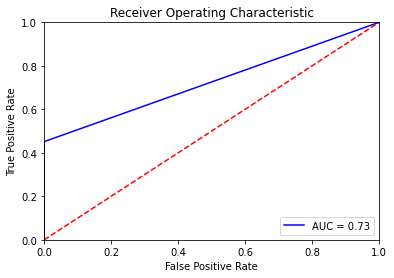

In [70]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

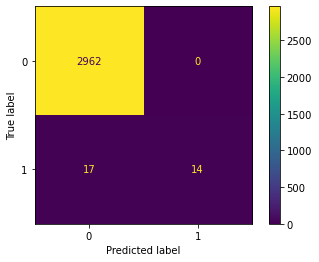

In [71]:
accuracy_score(y_test,predictions)
confusion_matrix(y_test,predictions)
plot_confusion_matrix(classification, X_test, y_test)
plt.show()

In [72]:
MAE = mean_absolute_error(y_test,predictions)
MSE = mean_squared_error(y_test,predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.01
The mean squared error of the model in the test set is:   0.01
The root mean squared error of the model in the test set is:   0.08
The R2 of the model in the test set is: 0.45


- run the KNN model

In [73]:
knn_model = KNeighborsRegressor(n_neighbors=4)
knn_model.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=4)

In [74]:
knn_predictions = knn_model.predict(X_test)

In [75]:
MAE = mean_absolute_error(y_test,knn_predictions)
MSE = mean_squared_error(y_test,knn_predictions)
RMSE = np.sqrt(MSE)
R2 = r2_score(y_test,knn_predictions)

print("The mean absolute error of the model in the test set is: %6.2f" % (MAE))
print("The mean squared error of the model in the test set is: %6.2f" % (MSE))
print("The root mean squared error of the model in the test set is: %6.2f" % (RMSE))
print("The R2 of the model in the test set is: %4.2f" % (R2))

The mean absolute error of the model in the test set is:   0.01
The mean squared error of the model in the test set is:   0.01
The root mean squared error of the model in the test set is:   0.07
The R2 of the model in the test set is: 0.49
